#  seaborn 연습문제

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

```문제 1) titanic 데이터```

In [21]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
titanic.embark_town.value_counts()  # 3개의 town


embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

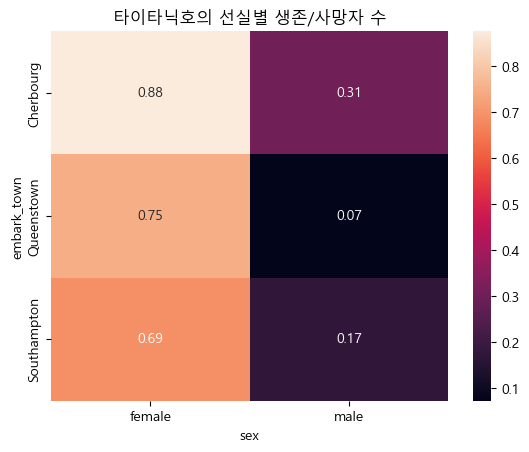

In [23]:
# 1) embark_town, sex별 생존률
dt = titanic.pivot_table('survived', 'embark_town','sex')

sns.heatmap(dt, annot=True, fmt='.2f')  # 소수점 2째자리까지
plt.title('타이타닉호의 선실별 생존/사망자 수');

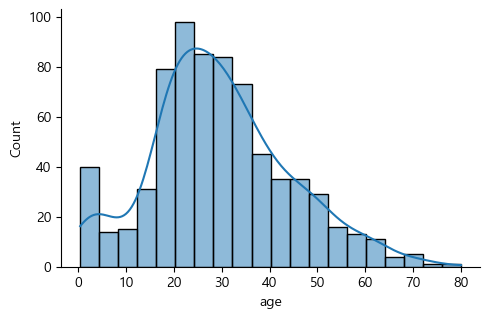

In [24]:
# 2) 나이분포 displot(distribution plot)

fig = sns.displot(x='age', kde=True, data=titanic)
fig.fig.set_size_inches(5,3);

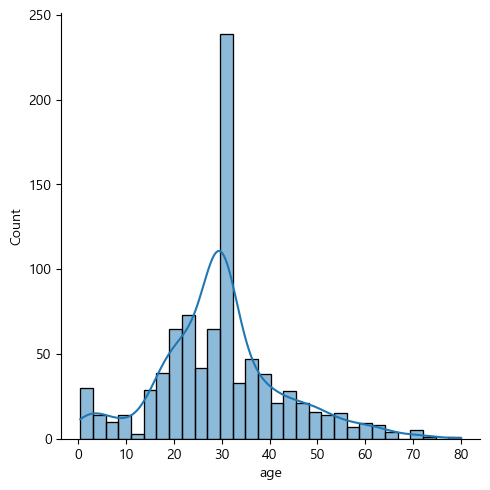

In [25]:
# 결측치를 평균으로 변경
titanic.age.fillna(titanic.age.mean(), inplace=True)
sns.displot(x='age', data=titanic, kde=True);

```문제 2) cctv 데이터```

In [26]:
filename = '../02.Pandas/data/서울시 자치구 년도별 CCTV 설치 현황_221231기준.csv'
columns = '구분,총계'.split(',')
cctv = pd.read_csv(filename, encoding='euc=kr', thousands=',')
cctv = cctv[columns]
cctv.drop([0], inplace=True)
cctv.rename(columns={'구분':'자치구'}, inplace=True)
cctv.head(3)

,자치구,총계
1,종로구,1980
2,중 구,2584
3,용산구,2847


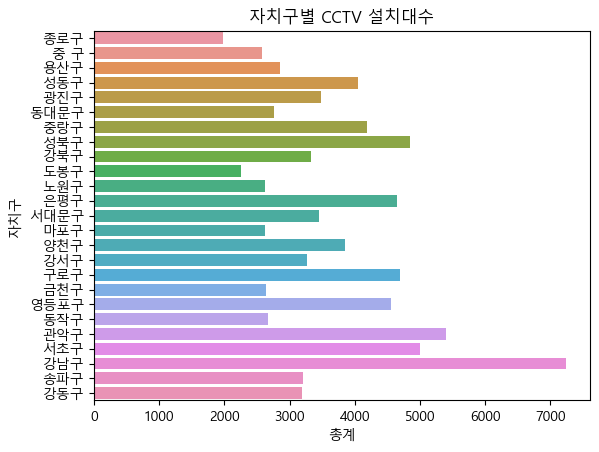

In [27]:
# 1. Unsorted
sns.barplot(x='총계', y='자치구', data=cctv)
plt.title('자치구별 CCTV 설치대수');

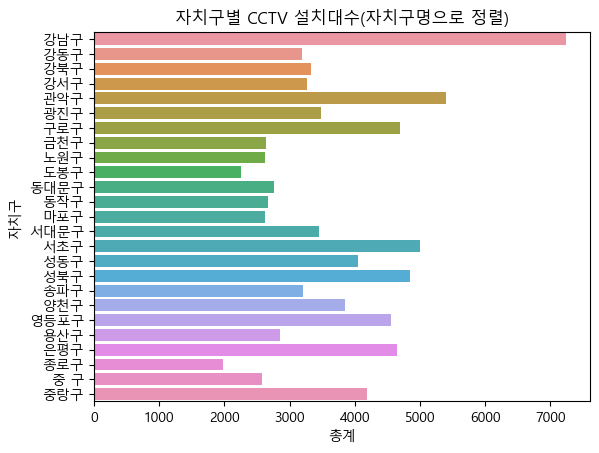

In [28]:
# 2. 자치구 이름으로 정렬(mpl과 정렬순서가 반대임-암기x. 우선 결과를 보고 나중에 asc추가하기)

si = cctv.sort_values(by='자치구')
sns.barplot(x='총계', y='자치구', data=si)
plt.title('자치구별 CCTV 설치대수(자치구명으로 정렬)');

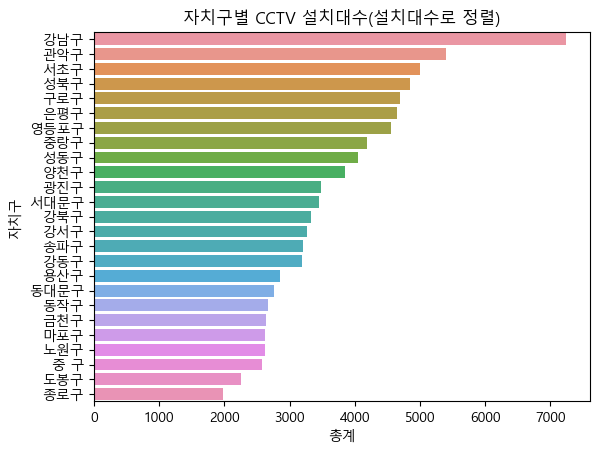

In [29]:
# 3. 설치대수로 정렬
sv = cctv.sort_values(by='총계', ascending=False)
sns.barplot(y='자치구', x='총계', data=sv)
plt.title('자치구별 CCTV 설치대수(설치대수로 정렬)');